In [21]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
res = joblib.load("./functions/results/results.pkl")
new_res = {}
for k, v in res.items():
    k_3 = k[3].replace("<class '", "").replace("'>", "").replace("torch.", "").replace("numpy.", "")
    key = (k[0], k[1], k[2], k_3, k[4])
    new_res[key] = v

df = pd.DataFrame.from_dict(new_res)
df.index = ["mean", "sem"]
df = df.T
df.index = df.index.set_names(["function", "implementation", "device", "dtype", "jitted"])
df

mean  \
function          implementation device dtype                 jitted             
bandpass_biquad   torchaudio     cpu    float32               0       0.374271   
                                                              1       0.221994   
                                        float64               0       0.142905   
                                                              1       0.138005   
phase vocoder     torchaudio     cpu    (complex64, float32)  0       0.137493   
                                                              1       0.141770   
                                        (complex128, float64) 0       0.255720   
                                                              1       0.232650   
                                 cuda:0 (complex64, float32)  0       0.003800   
                                                              1       0.003172   
                                        (complex128, float64) 0       0.003763   
                                                              1       0.003093   
                  librosa        cuda:0 complex64             0       1.196313   
                                        complex128            0       1.755423   
griffinlim        torchaudio     cpu    float32               0       1.863627   
                                                              1       2.009471   
                                        float64               0       3.156497   
                                                              1       3.102269   
                                 cuda:0 float32               0       0.041829   
                                                              1       0.040627   
                                        float64               0       0.064275   
                                                              1       0.062621   
                  librosa        cuda:0 float32               0       2.242753   
                                        float64               0       2.747968   
mfcc              torchaudio     cpu    float32               0       0.586137   
                                                              1       0.649933   
                                        float64               0       0.524763   
                                                              1       0.521944   
                                 cuda:0 float32               0       0.031714   
                                                              1       0.024880   
                                        float64               0       0.030090   
                                                              1       0.022911   
                  librosa        cuda:0 float32               0       0.525330   
                                        float64               0       0.642968   
spectral centroid torchaudio     cpu    float32               0       0.072756   
                                                              1       0.083024   
                                        float64               0       0.098188   
                                                              1       0.094951   
                                 cuda:0 float32               0       0.013043   
                                                              1       0.010660   
                                        float64               0       0.013234   
                                                              1       0.011352   
                  librosa        cuda:0 float32               0       0.341438   
                                        float64               0       0.363813   
spectrogram       torchaudio     cpu    float32               0       0.108469   
                                                              1       0.125579   
                                        float64               0       0.287516   
                                                        

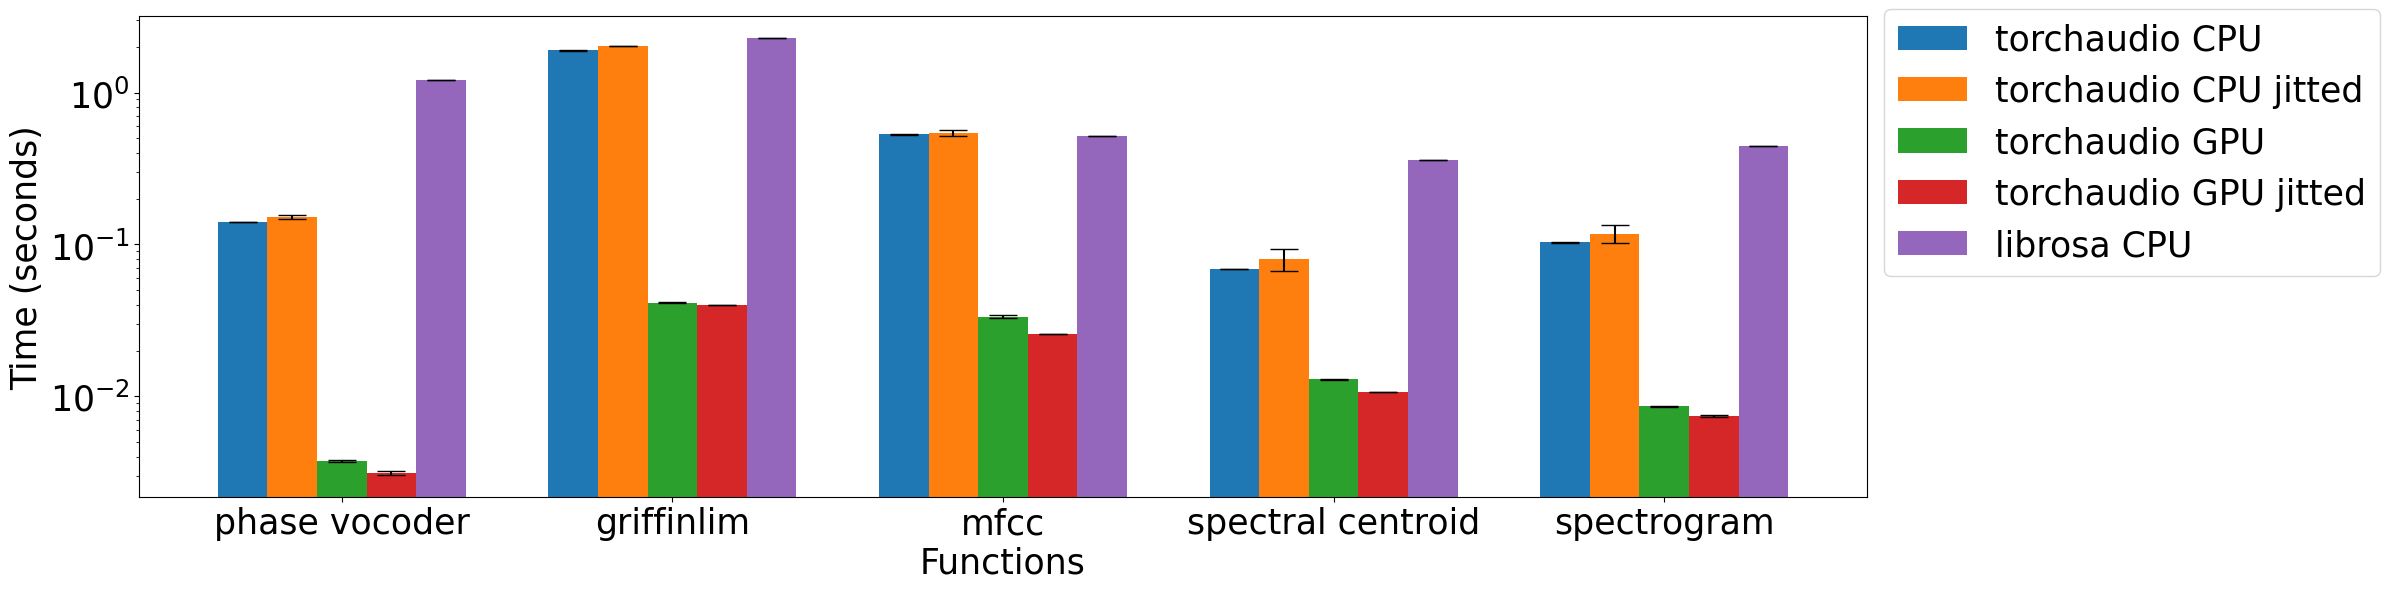

In [66]:
res = joblib.load("./functions/results/results.pkl")


functions = ["phase vocoder", "griffinlim", "mfcc", "spectral centroid", "spectrogram"]
keys = {
    "phase vocoder": [
        ["phase vocoder", "torchaudio", "cpu", "(torch.complex64, torch.float32)", 0],
        ["phase vocoder", "torchaudio", "cpu", "(torch.complex64, torch.float32)", 1],
        ["phase vocoder", "torchaudio", "cuda:0", "(torch.complex64, torch.float32)", 0],
        ["phase vocoder", "torchaudio", "cuda:0", "(torch.complex64, torch.float32)", 1],
        ["phase vocoder", "librosa", "cpu", "<class 'numpy.complex64'>", 0],
    ],
    "griffinlim": [
        ["griffinlim", "torchaudio", "cpu", "torch.float32", 0],
        ["griffinlim", "torchaudio", "cpu", "torch.float32", 1],
        ["griffinlim", "torchaudio", "cuda:0", "torch.float32", 0],
        ["griffinlim", "torchaudio", "cuda:0", "torch.float32", 1],
        ["griffinlim", "librosa", "cpu", "<class 'numpy.float32'>", 0],
    ],
    "mfcc": [
        ["mfcc", "torchaudio", "cpu", "torch.float32", 0],
        ["mfcc", "torchaudio", "cpu", "torch.float32", 1],
        ["mfcc", "torchaudio", "cuda:0", "torch.float32", 0],
        ["mfcc", "torchaudio", "cuda:0", "torch.float32", 1],
        ["mfcc", "librosa", "cpu", "<class 'numpy.float32'>", 0],
    ],
    "spectral centroid": [
        ["spectral centroid", "torchaudio", "cpu", "torch.float32", 0],
        ["spectral centroid", "torchaudio", "cpu", "torch.float32", 1],
        ["spectral centroid", "torchaudio", "cuda:0", "torch.float32", 0],
        ["spectral centroid", "torchaudio", "cuda:0", "torch.float32", 1],
        ["spectral centroid", "librosa", "cpu", "<class 'numpy.float32'>", 0],
    ],
    "spectrogram": [
        ["spectrogram", "torchaudio", "cpu", "torch.float32", 0],
        ["spectrogram", "torchaudio", "cpu", "torch.float32", 1],
        ["spectrogram", "torchaudio", "cuda:0", "torch.float32", 0],
        ["spectrogram", "torchaudio", "cuda:0", "torch.float32", 1],
        ["spectrogram", "librosa", "cpu", "<class 'numpy.float32'>", 0],
    ],
}
names = [
    "torchaudio CPU",
    "torchaudio CPU jitted",
    "torchaudio GPU",
    "torchaudio GPU jitted",
    "librosa CPU",
]

fig, ax = plt.subplots(figsize=(24, 6))
fn_width = 0.15
width = 0.15
fontsize = 25

for i in range(len(names)):
    means, sems = [], []
    for k, v in keys.items():
        means.append(res[tuple(v[i])][0])
        sems.append(res[tuple(v[i])][1])

    x = np.arange(len(keys))
    rects = ax.bar(x - (len(names)*width)/2 + ((i + 0.5) * fn_width),
                   means, yerr=sems, width=width, label=names[i],
                   lw=10, capsize=10)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Time (seconds)', fontsize=fontsize)
    ax.set_xlabel('Functions', fontsize=fontsize)
    ax.set_xticks(x)
    ax.tick_params(axis='x', labelsize=fontsize)
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.set_xticklabels(functions)
    ax.set_yscale('log')
    ax.legend(fontsize=fontsize, bbox_to_anchor=(1.0, 1.05))

    #ax.bar_label(rects, padding=3)

plt.tight_layout()
plt.savefig("./figs/function_bench.png")
plt.show()

In [24]:
res.keys()

dict_keys([('bandpass_biquad', 'torchaudio', 'cpu', 'torch.float32', 0), ('bandpass_biquad', 'torchaudio', 'cpu', 'torch.float32', 1), ('bandpass_biquad', 'torchaudio', 'cpu', 'torch.float64', 0), ('bandpass_biquad', 'torchaudio', 'cpu', 'torch.float64', 1), ('phase vocoder', 'torchaudio', 'cpu', '(torch.complex64, torch.float32)', 0), ('phase vocoder', 'torchaudio', 'cpu', '(torch.complex64, torch.float32)', 1), ('phase vocoder', 'torchaudio', 'cpu', '(torch.complex128, torch.float64)', 0), ('phase vocoder', 'torchaudio', 'cpu', '(torch.complex128, torch.float64)', 1), ('phase vocoder', 'torchaudio', 'cuda:0', '(torch.complex64, torch.float32)', 0), ('phase vocoder', 'torchaudio', 'cuda:0', '(torch.complex64, torch.float32)', 1), ('phase vocoder', 'torchaudio', 'cuda:0', '(torch.complex128, torch.float64)', 0), ('phase vocoder', 'torchaudio', 'cuda:0', '(torch.complex128, torch.float64)', 1), ('phase vocoder', 'librosa', 'cuda:0', "<class 'numpy.complex64'>", 0), ('phase vocoder', 'li

In [19]:
print(df.to_latex(float_format="%.3f", multirow=True))

\begin{tabular}{lllllrr}
\toprule
            &         &        &         &   &  mean &   sem \\
function & implementation & device & dtype & jitted &       &       \\
\midrule
\multirow{4}{*}{bandpass\_biquad} & \multirow{4}{*}{torchaudio} & \multirow{4}{*}{cpu} & \multirow{2}{*}{float32} & 0 & 0.374 & 0.007 \\
            &         &        &         & 1 & 0.222 & 0.004 \\
\cline{4-7}
            &         &        & \multirow{2}{*}{float64} & 0 & 0.143 & 0.001 \\
            &         &        &         & 1 & 0.138 & 0.001 \\
\cline{1-7}
\cline{2-7}
\cline{3-7}
\cline{4-7}
\multirow{10}{*}{phase vocoder} & \multirow{8}{*}{torchaudio} & \multirow{4}{*}{cpu} & \multirow{2}{*}{(complex64, float32)} & 0 & 0.137 & 0.003 \\
            &         &        &         & 1 & 0.142 & 0.003 \\
\cline{4-7}
            &         &        & \multirow{2}{*}{(complex128, float64)} & 0 & 0.256 & 0.005 \\
            &         &        &         & 1 & 0.233 & 0.000 \\
\cline{3-7}
\cline{4-7}
         